Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что правильно использованы train/valid/test наборы.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Тебе удалось добиться очень хорошего качества, поздравляю!
* Данный проект зачтен. Удачи в дальнейшем обучении!

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

#### Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».


В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.


Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

#### Описание данных


Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.
 * сalls — количество звонков,
 * minutes — суммарная длительность звонков в минутах,
 * messages — количество sms-сообщений,
 * mb_used — израсходованный интернет-трафик в Мб,
 * is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## 1. Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
#df = pd.read_csv('/datasets/users_behavior.csv')
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df['is_ultra'].mean()

0.30647168637212197

In [6]:
df['calls'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 136., 137., 138., 140., 141., 142., 143., 144.,
       145., 146., 148., 150., 151., 152., 153., 15

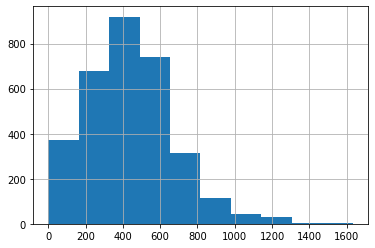

In [7]:
df['minutes'].hist()

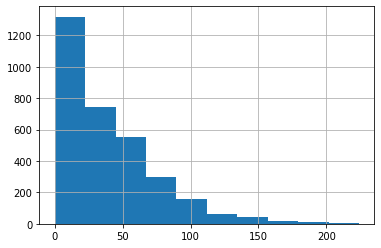

In [8]:
df['messages'].hist()

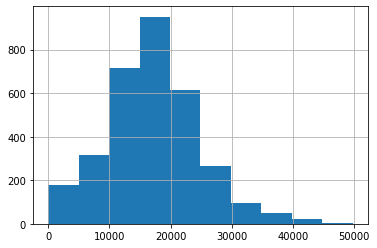

In [9]:
df['mb_used'].hist()

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный анализ данных проведены корректно.
</div>

## 2. Разбейте данные на выборки

Целевой признак это **тариф (is_ultra)**. Если целевой признак категориальный, то решается задача классификации. У нас бинарной классификации т.к. варианта ответа 2, Смарт или Ультра.

Признаки для обудения модели: **сalls — количество звонков, minutes — суммарная длительность звонков в минутах, messages — количество sms-сообщений, mb_used — израсходованный интернет-трафик в Мб.**

Разделим данные на 3 выборки: 

 - 60% обучающую
 - 20% валидационную
 - 20% тестовую

На валидационной будем проверять модель на переобучение

На тестовой конечный результат.

In [10]:
# Разделение на валидационную выборку
df_train, df_valid = train_test_split(df,test_size=0.20,random_state=42)

In [11]:
# Разделение на обучающую и тестовую выборки
df_train, df_test = train_test_split(df_train,test_size=0.25,random_state=42)

In [12]:
#Обучающие признаки

#признак для обучения
features_train = df_train[['calls','minutes','messages','mb_used']]
#целевой признак
target_train = df_train['is_ultra']

In [13]:
#Валидационные признаки

#признак для обучения
features_valid = df_valid[['calls','minutes','messages','mb_used']]
#целевой признак
target_valid = df_valid['is_ultra']

In [14]:
#Тестовые признаки

#признак для обучения
features_test = df_test[['calls','minutes','messages','mb_used']]
#целевой признак
target_test = df_test['is_ultra']

В начале создаем модель и обучаем ее на обучающей выборке, далее настраиваем гиперпараметры и проверяем точность на валидационной.

<div class="alert alert-block alert-info">
<b>Совет: </b> Эту часть желательно было перенести в предыдущий шаг.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Я бы вместое `df_test[['calls','minutes','messages','mb_used']]` использовал `df_test.drop('is_ultra', axis=1)`

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Логика была такая: чтобы признаки для обучения модели всегда были перед глазами
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Также желательно было напечатать размеры полученных наборов. Иногда это помогает избежать ошибок. В данном случае разбиение проведено корректно.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> добавил
</div>

In [15]:
features_train.count()

calls       1928
minutes     1928
messages    1928
mb_used     1928
dtype: int64

In [16]:
features_valid.count()

calls       643
minutes     643
messages    643
mb_used     643
dtype: int64

In [17]:
features_test.count()

calls       643
minutes     643
messages    643
mb_used     643
dtype: int64

## 3. Исследуйте модели

#### Решающее дерево	

Применим решающее дерево к нашим данным, оценим качество модели на разных параметрах максимальной глубины. Выберем лучшую модель.

In [18]:
best_model_Tree = None
best_result = 0
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=42,max_depth=depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_result:
        best_result = result
        best_depth = depth
        best_model_Tree = model
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Максимальная глубина:", best_depth)
        

Accuracy наилучшей модели на валидационной выборке: 0.8040435458786936 Максимальная глубина: 5


#### Случайный лес

Применим Случайный лес к нашим данным, оценим качество модели на разных параметрах максимальной глубины и количества деревьев. Выберем лучшую модель.


In [19]:
best_model_Forest = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=42,n_estimators=est,max_depth=depth)
        model.fit(features_train,target_train)
        predictions_valid =model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result:
            best_model_Forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)             

Accuracy наилучшей модели на валидационной выборке: 0.8242612752721618 Количество деревьев: 40 Максимальная глубина: 8


Хотел применить class_weight = "balanced", но качество становится хуже

#### Логистическая регрессия

In [20]:
model_LogisticRegression = LogisticRegression(random_state=42)
model_LogisticRegression.fit(features_train,target_train)
predictions_valid = model_LogisticRegression.predict(features_valid)
result = accuracy_score(target_valid, predictions_valid)
print("Accuracy модели на валидационной выборке:",result)

Accuracy модели на валидационной выборке: 0.702954898911353


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Лучшее качество модели показывает Случайный лес, далее идёт Решающее дерево, самую низкую точность Логистическая регрессия

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что ты попробовал несколько моделей, а в одной из них подобрал сразу несколько парамтеров.
</div>

## 4. Проверьте модель на тестовой выборке

In [21]:
#Решающее дерево
print(accuracy_score(target_test, best_model_Tree.predict(features_test)))

0.7713841368584758


In [22]:
#Случайный лес
print(accuracy_score(target_test, best_model_Forest.predict(features_test)))

0.7978227060653188


In [23]:
#Логистическая регрессия
print(accuracy_score(target_test, model_LogisticRegression.predict(features_test)))

0.7216174183514774


<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено корректно.
</div>

## 5. (бонус) Проверьте модели на адекватность

Возьмем модель, которая предсказывает везде одно и то же значение. Далее сравним с метрикой нашей лучшей модели

In [24]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features_train,target_train)
dummy_clf.score(features_train,target_train)

0.6862033195020747

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что был использован dummy classifier. В будущем советую проводить эту проверку до обучения моделей.
</div>

## Вывод

Реализована модель способная проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра» с максимально большим значением accuracy (Случайный лес и Решающее дерево).

Доля правильных ответов больше 0.75 (0.7713841368584758 и 0.7978227060653188)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
